One place in Data Science where **multinomial naive Bayes** is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified.

In this data science project we will use the sparse word count features from the **20 Newsgroups corpus** to show how we might classify these short documents into categories.

Let’s download the data and take a look at the target names:

In [1]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

For simplicity, we will select just a few of these categories, and download the training and testing set:

In [2]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [4]:
# Here is a representative entry from the data:

print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers. For this we will use the **TF–IDF vectorizer**, and create a pipeline that attaches it to a **multinomial naive Bayes** classifier:

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [6]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

With this pipeline, we can apply the model to the training data, and predict labels for the test data:

In [7]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Now that we have predicted the labels for the test data, we can evaluate them to learn about the performance of the estimator. For example, here is the **confusion matrix between the true and predicted labels for the test data**:

In [9]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(test.target, labels)
mat

array([[344,  13,  32,   0],
       [  6, 364,  24,   0],
       [  1,   5, 392,   0],
       [  4,  12, 187,  48]], dtype=int64)

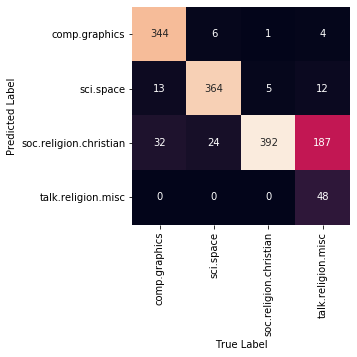

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,
            xticklabels=train.target_names,yticklabels=train.target_names)
plt.xlabel('True Label')
plt.ylabel("Predicted Label")

plt.show()

Evidently, even this very simple classifier can successfully separate space talk from computer talk, but it gets confused between talk about religion and talk about Christianity. This is perhaps an expected area of confusion.

The very cool thing here is that we now have the tools to determine the category for any string, using the `predict()` method of this **pipeline**. Here’s a quick utility function that will return the prediction for a single string:

In [11]:
def predict_category(s, train=train,model=model):
    pred = model.predict([s])
    print(train.target_names[pred[0]])

In [12]:
predict_category("sending a payload to the ISS")

sci.space


In [13]:
predict_category("discussing islam vs atheism")

soc.religion.christian


In [14]:
predict_category("determining the screen resolution")

comp.graphics


Remember that this is nothing more sophisticated than a simple probability model for the (weighted) frequency of each word in the string; nevertheless, the result is striking. Even a very naive algorithm, when used carefully and trained on a large set of high-dimensional data, can be surprisingly effective.